## importing Libraraies

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## imporing Dataset

In [19]:
dataset = pd.read_csv('Student_Marks.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [20]:
print(x)

[[4.508]
 [0.096]
 [3.133]
 [7.909]
 [7.811]
 [3.211]
 [6.063]
 [3.413]
 [4.41 ]
 [6.173]
 [7.353]
 [0.423]
 [4.218]
 [4.274]
 [2.908]
 [4.26 ]
 [5.719]
 [6.08 ]
 [7.711]
 [3.977]
 [4.733]
 [6.126]
 [2.051]
 [4.875]
 [3.635]
 [1.407]
 [0.508]
 [4.378]
 [0.156]
 [1.299]
 [3.864]
 [1.923]
 [0.932]
 [6.594]
 [4.083]
 [7.543]
 [2.966]
 [7.283]
 [6.533]
 [7.775]
 [0.14 ]
 [2.754]
 [3.591]
 [1.557]
 [1.954]
 [2.061]
 [3.797]
 [4.779]
 [5.635]
 [3.913]
 [6.703]
 [4.13 ]
 [0.771]
 [6.049]
 [7.591]
 [2.913]
 [7.641]
 [7.649]
 [6.198]
 [7.468]
 [0.376]
 [2.438]
 [3.606]
 [4.869]
 [0.13 ]
 [2.142]
 [5.473]
 [0.55 ]
 [1.395]
 [3.948]
 [3.736]
 [2.518]
 [4.633]
 [1.629]
 [6.954]
 [0.803]
 [6.379]
 [5.985]
 [7.451]
 [0.805]
 [7.957]
 [2.262]
 [7.41 ]
 [3.197]
 [1.982]
 [6.201]
 [4.067]
 [1.033]
 [1.803]
 [6.376]
 [4.182]
 [2.73 ]
 [5.027]
 [6.471]
 [3.919]
 [3.561]
 [0.301]
 [7.163]
 [0.309]
 [6.335]]


In [21]:
print(y)

[19.202  7.734 13.811 53.018 55.299 17.822 29.889 17.264 20.348 30.862
 42.036 12.132 24.318 17.672 11.397 19.466 30.548 38.49  50.986 25.133
 22.073 35.939 12.209 28.043 16.517  6.623 12.647 26.532  9.333  8.837
 24.172  8.1   15.038 39.965 17.171 43.978 13.119 46.453 41.358 51.142
  7.336 15.725 19.771 10.429  9.742  8.924 16.703 22.701 26.882 19.106
 40.602 22.184  7.892 36.653 53.158 18.238 53.359 51.583 31.236 51.343
 10.522 10.844 19.59  21.379 12.591 13.562 27.569  6.185  8.92  21.4
 16.606 13.416 20.398  7.014 39.952  6.217 36.746 38.278 49.544  6.349
 54.321 17.705 44.099 16.106 16.461 39.957 23.149  6.053 11.253 40.024
 24.394 19.564 23.916 42.426 24.451 19.128  5.609 41.444 12.027 32.357]


## Splitting the dataset into the Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train_scaled = sc_x.fit_transform(x_train)
x_test_scaled = sc_x.fit_transform(x_test)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = sc_y.transform(y_test.reshape(-1, 1))

## training Model

In [24]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(x_train_scaled,y_train_scaled.ravel())

SVR()

## Predict

In [25]:
y_pred_scaled = regressor.predict(x_test_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

In [26]:
# Print the actual test data vs the predicted data for comparison with 3 decimal places
print("Test data (actual) vs Predicted data:")
for actual, predicted in zip(y_test, y_pred.flatten()):
    print(f"Actual: {actual:.3f}, Predicted: {predicted:.3f}")


Test data (actual) vs Predicted data:
Actual: 12.647, Predicted: 12.690
Actual: 23.149, Predicted: 19.936
Actual: 13.811, Predicted: 14.545
Actual: 18.238, Predicted: 13.165
Actual: 6.217, Predicted: 10.746
Actual: 42.426, Predicted: 42.698
Actual: 30.548, Predicted: 32.604
Actual: 7.014, Predicted: 8.144
Actual: 53.158, Predicted: 52.612
Actual: 19.128, Predicted: 17.151
Actual: 36.653, Predicted: 36.872
Actual: 23.916, Predicted: 25.725
Actual: 49.544, Predicted: 52.227
Actual: 17.672, Predicted: 21.029
Actual: 17.264, Predicted: 16.273
Actual: 24.172, Predicted: 18.853
Actual: 12.209, Predicted: 8.804
Actual: 16.517, Predicted: 17.578
Actual: 39.965, Predicted: 44.344
Actual: 20.348, Predicted: 21.762


## Visualization data

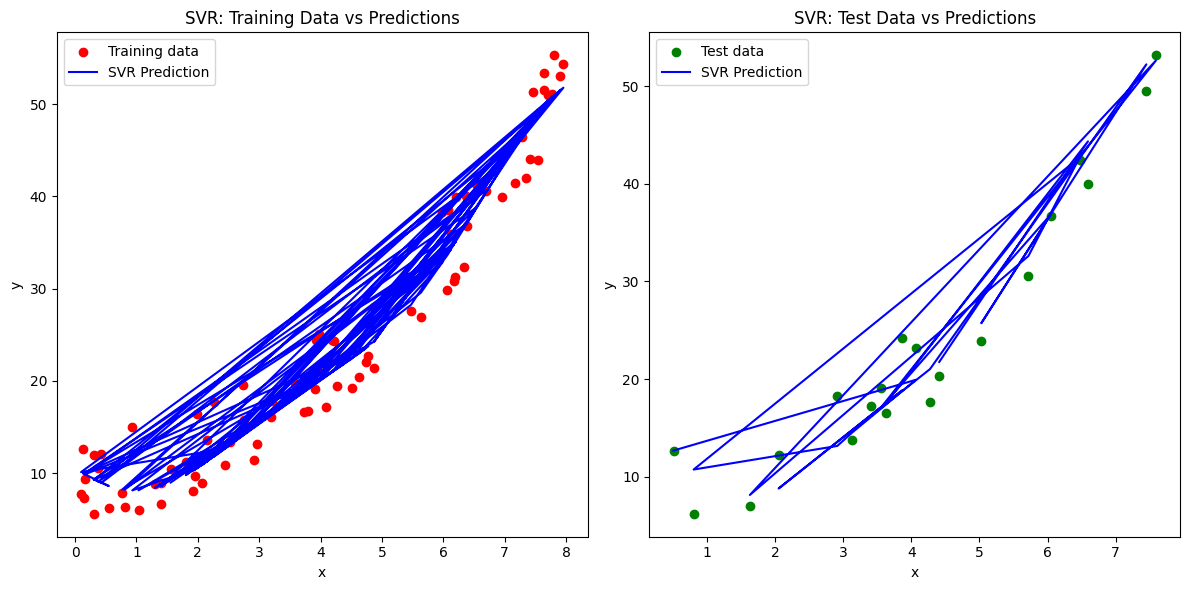

In [27]:
plt.figure(figsize=(12, 6))  # Set figure size for better clarity

# Plot for Training data
plt.subplot(1, 2, 1)  # One row, two columns, first subplot
plt.scatter(x_train, y_train, color='red', label='Training data')  # Training data points
plt.plot(x_train, sc_y.inverse_transform(regressor.predict(x_train_scaled).reshape(-1, 1)), color='blue', label='SVR Prediction')  # SVR prediction curve for training data
plt.title('SVR: Training Data vs Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot for Test data
plt.subplot(1, 2, 2)  # One row, two columns, second subplot
plt.scatter(x_test, y_test, color='green', label='Test data')  # Test data points
plt.plot(x_test, y_pred, color='blue', label='SVR Prediction')  # SVR prediction curve for test data
plt.title('SVR: Test Data vs Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Display the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate R² (R-squared)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the results
print(f"R² (R-squared): {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

R² (R-squared): 0.956
Mean Squared Error (MSE): 7.593
Root Mean Squared Error (RMSE): 2.755
